In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, InputLayer
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import nasnet, resnet50, densenet
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_gen = train_datagen.flow_from_directory(
        'cars/train',
        target_size=(64, 64),
        batch_size=4,
        class_mode='binary',
        shuffle=True)

val_gen = val_datagen.flow_from_directory(
        'cars/val',
        target_size=(64, 64),
        batch_size=4,
        class_mode='binary',
        shuffle=False)

test_gen = test_datagen.flow_from_directory(
        'cars/test',
        target_size=(64, 64),
        batch_size=4,
        class_mode='binary',
        shuffle=False)

Found 47 images belonging to 2 classes.
Found 11 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [18]:
train_batches = int(train_gen.samples / train_gen.batch_size) * 2
val_batches = int(val_gen.samples / val_gen.batch_size)

In [19]:
input_shape = (64, 64, 3)
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=3, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))

opt = optimizers.Nadam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy'])


In [20]:
history = model.fit_generator(
        generator=train_gen,
        validation_data=val_gen,
        verbose=1,
        epochs=5,
        steps_per_epoch=train_batches,
        validation_steps=val_batches
)

Epoch 1/5
22/22 [==============================] - 15s 699ms/step - loss: 8.9987 - binary_accuracy: 0.4186 - val_loss: 11.4999 - val_binary_accuracy: 0.2500
Epoch 2/5
22/22 [==============================] - 14s 627ms/step - loss: 8.9431 - binary_accuracy: 0.4186 - val_loss: 11.4999 - val_binary_accuracy: 0.2500
Epoch 3/5
22/22 [==============================] - 14s 648ms/step - loss: 9.9896 - binary_accuracy: 0.3488 - val_loss: 11.4999 - val_binary_accuracy: 0.2500
Epoch 4/5
22/22 [==============================] - 14s 625ms/step - loss: 8.7720 - binary_accuracy: 0.4253 - val_loss: 11.4999 - val_binary_accuracy: 0.2500
Epoch 5/5
22/22 [==============================] - 13s 580ms/step - loss: 8.8843 - binary_accuracy: 0.4235 - val_loss: 11.4999 - val_binary_accuracy: 0.2500


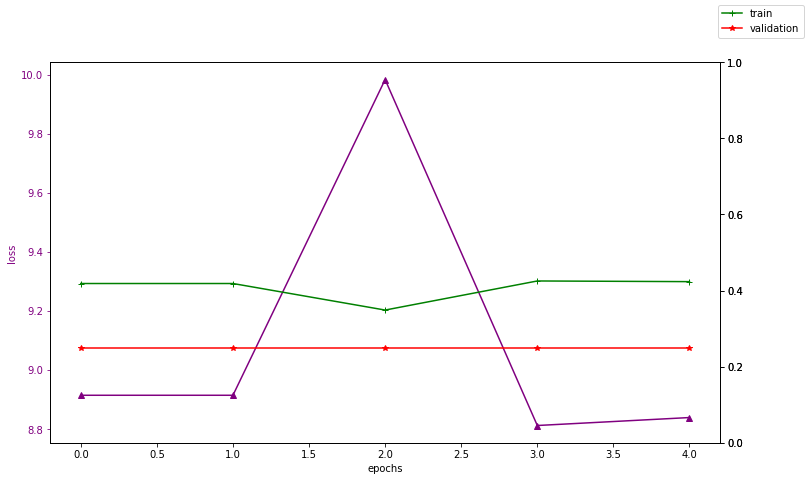

In [22]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['binary_accuracy'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_binary_accuracy'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.legend();

In [23]:
model.evaluate_generator(test_gen)

[7.666619300842285, 0.45454547]